In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yahist

from utils.analysis import Validation

plt.rcParams.update({"figure.facecolor": (1,1,1,0)})

TAG = "pku"

In [2]:
presort_babies = sorted(glob.glob(f"../analysis/studies/vbswh/output_{TAG}/Run2/*.root"))
presort_babies = [baby for baby in presort_babies if "VBSWH_mkW" not in baby]
babies = []
for baby in sorted(presort_babies, reverse=True):
    if "EWK" in baby.split("/")[-1]:
        babies.append(baby)
    else:
        babies.insert(0, baby)
babies

['../analysis/studies/vbswh/output_pku/Run2/Bosons.root',
 '../analysis/studies/vbswh/output_pku/Run2/SingleTop.root',
 '../analysis/studies/vbswh/output_pku/Run2/TTX.root',
 '../analysis/studies/vbswh/output_pku/Run2/TTbar1L.root',
 '../analysis/studies/vbswh/output_pku/Run2/TTbar2L.root',
 '../analysis/studies/vbswh/output_pku/Run2/VBSWH_SM.root',
 '../analysis/studies/vbswh/output_pku/Run2/VH.root',
 '../analysis/studies/vbswh/output_pku/Run2/WJets.root',
 '../analysis/studies/vbswh/output_pku/Run2/data.root',
 '../analysis/studies/vbswh/output_pku/Run2/EWKWLep.root']

In [3]:
vbswh = Validation(
    bkg_root_files=[baby for baby in babies if "data" not in baby],
    data_root_files=[baby for baby in babies if "data" in baby],
    ttree_name="tree",
    weight_columns=[
        "xsec_sf", "lep_id_sf", "elec_reco_sf", "muon_iso_sf", 
        "btag_sf", "pu_sf", "prefire_sf", "trig_sf"
    ],
    plots_dir=f"/home/users/jguiang/public_html/onelep_plots/{TAG}/val"
)
vbswh.df["presel_noVBS_noBVeto"] = vbswh.df.eval(
    "hbbjet_score > 0.3"
)
vbswh.df["presel_noVBS"] = vbswh.df.eval(
    "passes_bveto and hbbjet_score > 0.3"
)
vbswh.df["presel_noDetaJJ"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and hbbjet_score > 0.3"
)
vbswh.df["presel"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and abs(deta_jj) > 3 and hbbjet_score > 0.3"
)

vbswh.df["regionA"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) > 4 and hbbjet_msoftdrop >= 150"
)
vbswh.df["regionB"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) <= 4 and hbbjet_msoftdrop >= 150"
)
vbswh.df["regionC"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) <= 4 and hbbjet_msoftdrop < 150"
)

Loading data babies: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_msoftdrop_data_vs_mc_presel_and_hbbjet_msoftdrop_geq_150.png


/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/yahist/fit.py:301: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = ((func(xdata, *popt) - ydata) ** 2.0 / yerrs ** 2.0).sum()


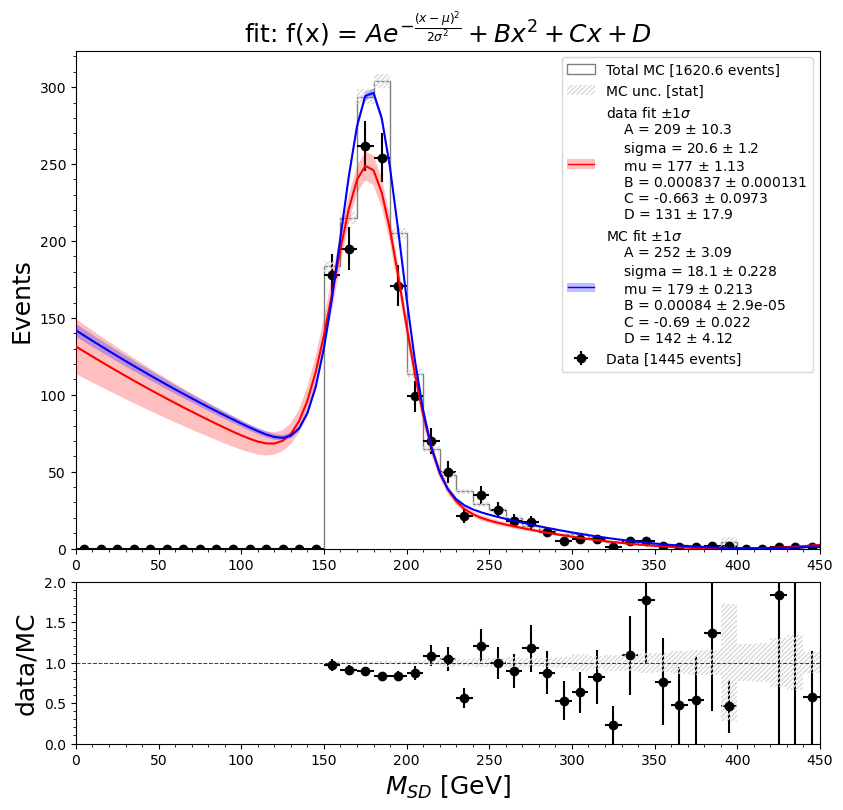

In [81]:
hist_axes, ratio_axes, hists = vbswh.plot_data_vs_mc(
    "hbbjet_msoftdrop", bins=np.linspace(0, 450, 46), 
    selection="presel and hbbjet_msoftdrop >= 150",
    x_label=r"$M_{SD}$ [GeV]",
    return_hists=True
)

data_hist, mc_hist, ratio_hist = hists

yahist.fit.fit_hist(
    lambda x, A, sigma, mu, B, C, D: A*np.exp(-0.5*((x - mu)**2)/(sigma**2)) + B*x**2 + C*x + D,
    data_hist,
    ax=hist_axes,
    label=r"data fit $\pm1\sigma$",
    curve_fit_kwargs={"p0": [300, 15, 175, -0.005, -0.5, 180]},
    extent=(150, 450)
)

yahist.fit.fit_hist(
    lambda x, A, sigma, mu, B, C, D: A*np.exp(-((x - mu)**2)/(2*sigma**2)) + B*x**2 + C*x + D,
    mc_hist,
    ax=hist_axes,
    label=r"MC fit $\pm1\sigma$",
    color="blue",
    curve_fit_kwargs={"p0": [300, 15, 175, -0.005, -0.5, 180]},
    extent=(150, 450)
)

hist_axes.set_title(r"fit: f(x) = $Ae^{-\frac{(x - \mu)^2}{2\sigma^2}} + Bx^2 + Cx + D$", size=18);

Wrote plot to /home/users/jguiang/public_html/onelep_plots/pku/val/hbbjet_msoftdrop_data_vs_mc_presel_noDetaJJ_and_abs(deta_jj)_leq_3.png


/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/yahist/fit.py:301: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = ((func(xdata, *popt) - ydata) ** 2.0 / yerrs ** 2.0).sum()


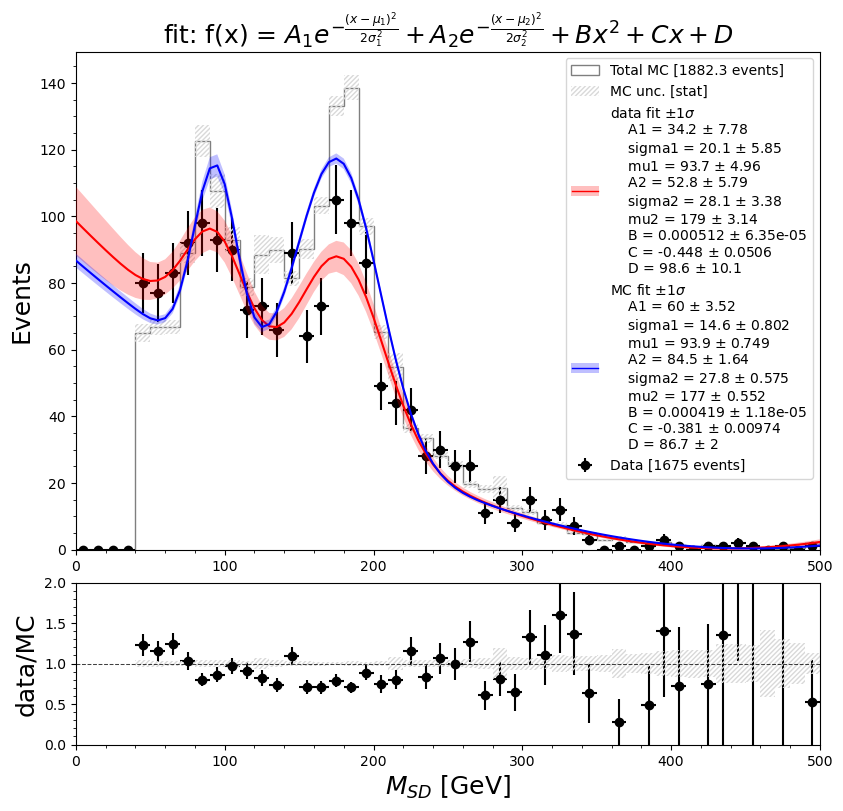

In [111]:
hist_axes, ratio_axes, hists = vbswh.plot_data_vs_mc(
    "hbbjet_msoftdrop", np.linspace(0, 500, 51), 
    selection="presel_noDetaJJ and abs(deta_jj) <= 3",
    x_label="$M_{SD}$ [GeV]",
    return_hists=True
);


data_hist, mc_hist, ratio_hist = hists

g = lambda x, A, sigma, mu: A*np.exp(-0.5*((x - mu)**2)/(sigma**2))

yahist.fit.fit_hist(
    lambda x, A1, sigma1, mu1, A2, sigma2, mu2, B, C, D: g(x, A1, sigma1, mu1) + g(x, A2, sigma2, mu2) + B*x**2 + C*x + D,
#     lambda x, A1, sigma1, mu1, A2, sigma2, mu2, A3, sigma3, mu3, B, C, D: g(x, A1, sigma1, mu1) + g(x, A2, sigma2, mu2) + g(x, A3, sigma3, mu3) + B*x**2 + C*x + D,
    data_hist,
    ax=hist_axes,
    label=r"data fit $\pm1\sigma$",
    curve_fit_kwargs={"p0": [100, 10, 80, 100, 15, 175, 0.0005, -0.5, 100]},
#     curve_fit_kwargs={"p0": [100, 10, 80, 100, 15, 175, 10, 10, 125, 0.0005, -0.5, 100]},
    extent=(40, 500)
)

yahist.fit.fit_hist(
    lambda x, A1, sigma1, mu1, A2, sigma2, mu2, B, C, D: g(x, A1, sigma1, mu1) + g(x, A2, sigma2, mu2) + B*x**2 + C*x + D,
#     lambda x, A1, sigma1, mu1, A2, sigma2, mu2, A3, sigma3, mu3, B, C, D: g(x, A1, sigma1, mu1) + g(x, A2, sigma2, mu2) + g(x, A3, sigma3, mu3) + B*x**2 + C*x + D,
    mc_hist,
    ax=hist_axes,
    label=r"MC fit $\pm1\sigma$",
    color="blue",
    curve_fit_kwargs={"p0": [120, 10, 80, 140, 15, 175, 0.0005, -0.5, 100]},
#     curve_fit_kwargs={"p0": [120, 10, 80, 140, 15, 175, 60, 10, 125, 0.0005, -0.5, 100]},
    extent=(40, 500)
)

hist_axes.set_title(r"fit: f(x) = $A_1e^{-\frac{(x - \mu_1)^2}{2\sigma_1^2}} + A_2e^{-\frac{(x - \mu_2)^2}{2\sigma_2^2}} + Bx^2 + Cx + D$", size=18);